# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 3. Робастная статистика. Доверительное оценивание.
### Дедлайн --- 10 ноября 23:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

0) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения, то рисуйте его синим цветом.

In [2]:
color_for_normal, color_for_laplace, color_for_cauchy = sns.color_palette("colorblind")[:3]

N = 500

# YOUR CODE HERE

1) Постройте график плотности распределения для всех трех распределений на одних осях.

2) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:**

In [ ]:
# Эксперименты с оценкой средним и медианы


3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [ ]:
def truncated_mean(sample, alpha=0.3):
    # YOUR CODE HERE
    return truncated_mean

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

6) Breakdown point в статистике неформально называется такое наибольшее число $x$ от 0 до 1, что если изменить больше $(100\cdot x)\%$ наблюдений выборки на выбросы, то оценка "пойдёт в разнос" и её значение может оказаться сколь угодно большим по модулю, как если бы вся выборка состояла из выбросов.

Предположите, как Breakdown point зависит от параметра $\alpha$.

Ответ:

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных $(100\cdot x)\%$ выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

7) Для каждого распределения на отдельном графике по всем префиксам постройте значение трех оценок: среднего, медианы и усечённого среднего порядка $0.35$. Для усечённого среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

**Нормальное распределение**

**Распределение Лапласа**

**Распределение Коши**

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального Правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}(\sum_{i=1}^n\rho(x_i - \theta))$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее? Указание: "усекать" можно не только по квантилю, но и по числу

Ответ:

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $(\sum_{i=1}^n\psi(x_i - \theta)) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ:

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

3.5) Выразите усечённое среднее как L-оценку

Ответ:

4) Сравните результаты, полученные для трёх распределений и разных функций влияния.

5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Сделайте единый вывод о робастном оценивании:

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [3]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: C:\Users\natas\PycharmProjects\math_stat_homework\winequality-red.csv

  0%|          | 0.00/101k [00:00<?, ?B/s]
100%|##########| 101k/101k [00:00<00:00, 208kB/s]
100%|##########| 101k/101k [00:00<00:00, 208kB/s]


In [15]:
import pandas as pd

In [6]:
data = pd.read_csv("winequality-red.csv")

In [7]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [8]:
data['category'] = ''

In [9]:
data.loc[data['alcohol'] <= 10, 'category'] = 'low alcohol'
data.loc[data['alcohol'] > 12, 'category'] = 'high alcohol'
data.loc[data['category'] == '', 'category'] = 'medium alcohol'

In [10]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low alcohol
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low alcohol
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,low alcohol
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium alcohol
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium alcohol
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium alcohol
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [11]:
pd.pivot_table(data=data, index='category', values='residual sugar', aggfunc=['mean', 'median'])

,mean,median
,residual sugar,residual sugar
category,,
high alcohol,2.760993,2.3
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Кажется, что с увеличением содержания алкоголя растет и остаточный сахар, тол есть видимо есть положительная корреляция. Также можно заметить, что для всех трех случаев медиана меньше среднего, то есть видимо в данных есть большие значения остаточного сахара, из-за которых повышается значение среднего (тяжелый правый хвост).

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

[]

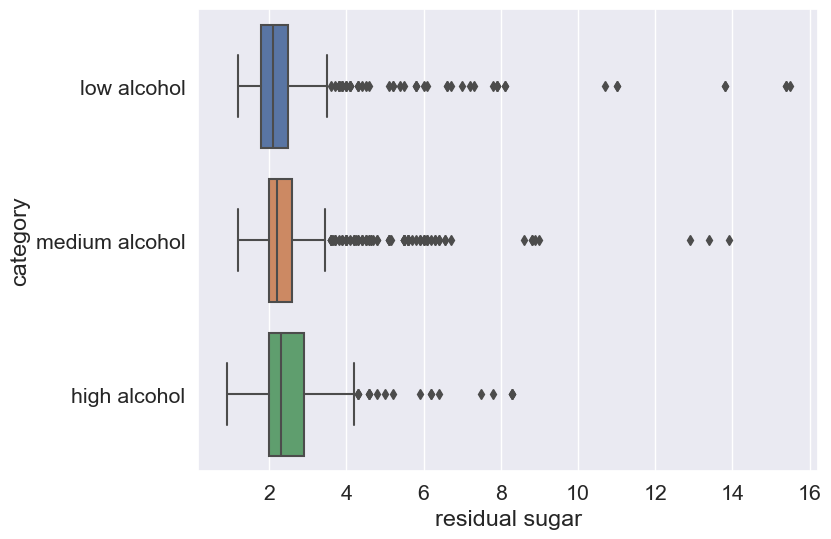

In [14]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
#YOUR CODE GOES HERE

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['residual sugar'], y=data['category'])
plt.plot()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** Хочется отметить, что на графике боксплота действительно видны большие значения остаточного сахара, которые, по предположению выше, повлияли на значение среднего. Думаю, что для оцени лучше использовать медиану, так как она не так зависит от выбросов, как среднее (а выбросов, судя по графику, довольно много). Вообще, если бы для всех трех категория медиана находилась посередине ящика, можно было бы сказать, что медиана хорошо устойчива к выбросам, но видно, что для medium и high медиана смещена влево (и это тоже подтверждает предположение выше о тяжелом правом хвосте).

Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

Ответ: Всего выборок три - с низким, средним и высоким содержанием вина. На графике видно, что выбросов много. В этом случае лучше использовать медиану в качестве оценки параметра.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

[]

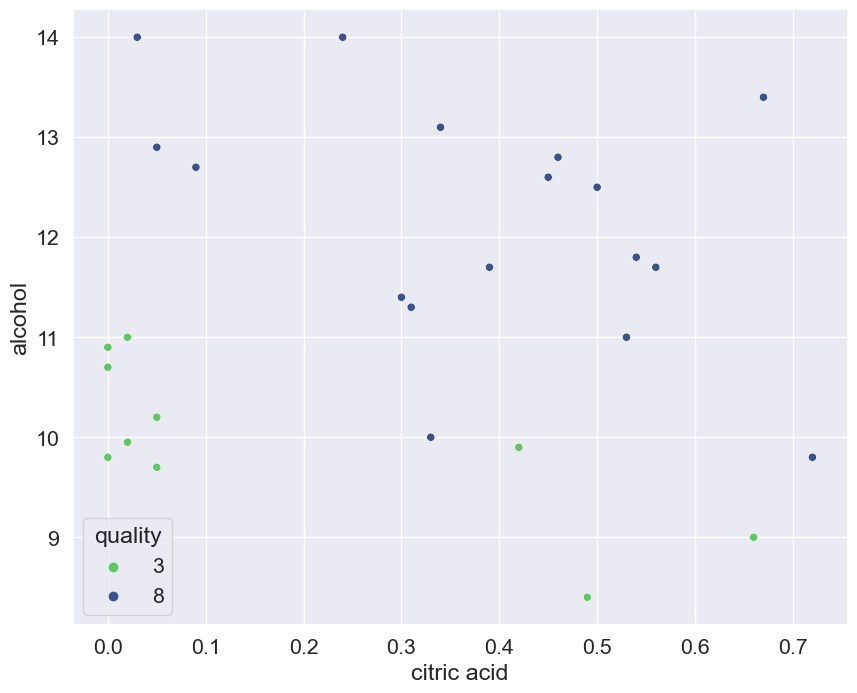

In [15]:
#YOUR CODE GOES HERE

good_bad_df = data[(data['quality'] == 8) | (data['quality'] == 3)]
good_df = data[(data['quality'] == 8)]
bad_df = data[(data['quality'] == 3)]

plt.figure(figsize=(10, 8))
sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])
plt.plot()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

Text(0, 0.5, 'Alcohol')

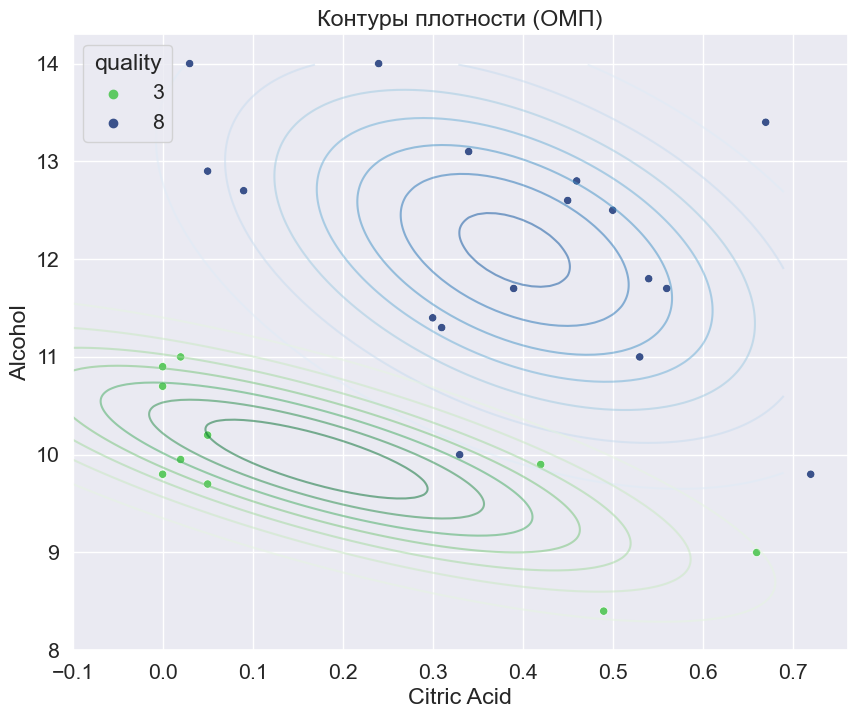

In [16]:
X, Y = np.mgrid[-0.1:0.7:.01, 8:14:.01]
pos = np.dstack((X, Y))

mu_good = np.mean(good_df[['citric acid', 'alcohol']], axis=0)
sigma_good = np.cov(good_df[['citric acid', 'alcohol']].T)

mu_bad = np.mean(bad_df[['citric acid', 'alcohol']], axis=0)
sigma_bad = np.cov(bad_df[['citric acid', 'alcohol']].T)

rv1_om = sps.multivariate_normal(mu_good, sigma_good)
rv2_om = sps.multivariate_normal(mu_bad, sigma_bad)

plt.figure(figsize=(10, 8))

plt.contour(X, Y, rv1_om.pdf(pos), cmap='Blues', alpha=0.5)
plt.contour(X, Y, rv2_om.pdf(pos), cmap='Greens', alpha=0.5)
sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])
plt.title('Контуры плотности (ОМП)')
plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')

Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

Я рассмотрю три способа для робастных оценок:
1. Вместо среднего использую медиану, а для ковариационной матрицы использую Minimum Covariance Determinant (нашла вот тут) https://scikit-learn.ru/stable/modules/covariance.html)
2. Вместо среднего использую снова медиану, а для ковариационной матрицы - Median Absolute Deviation
3. И для третьего варианта я снова рассмотрю в качестве среднего медиану, а для ковариационной матрицы - оценку по квартилям

Насколько я понимаю, результат, который я хочу получить, должен учитывать наличие выбросов (логично, так как оценки робастные). То есть контуры должны находиться вокруг основного множества точек. На графике выше видно, что для низкокачественного вина (зеленые точки) основные значения находятся примерно в одном месте, а выбросы для них находятся достаточно далеко, и хочется, чтобы контуры плотности их не охватывали. Видно, что при использовании ОМП этот момент не учитывается и контуры охватывают так же выбросы.

Из всех трех вариантов лучше всего с этой задачей справляется именно первый - используя медиану и MCD зеленые контуры не заходят на выбросы, и само расположение лучше, чем при использовании MAD. В последнем случае контуры получились вообще странные и результат не тот, который нужен. 

In [41]:
#YOUR CODE GOES HEREи 

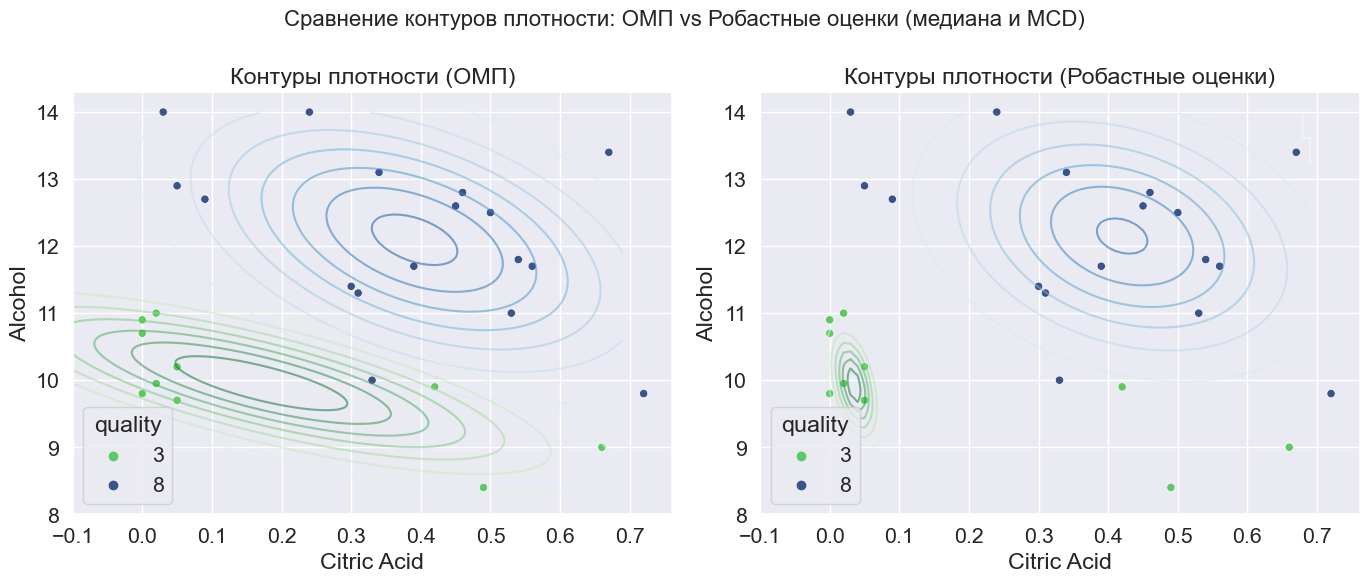

In [17]:
from sklearn.covariance import MinCovDet

robust_mu_good = np.median(good_df[['citric acid', 'alcohol']], axis=0)
robust_mu_bad = np.median(bad_df[['citric acid', 'alcohol']], axis=0)

robust_cov_good = MinCovDet().fit(good_df[['citric acid', 'alcohol']]).covariance_
robust_cov_bad = MinCovDet().fit(bad_df[['citric acid', 'alcohol']]).covariance_

rv1_robust = sps.multivariate_normal(robust_mu_good, robust_cov_good)
rv2_robust = sps.multivariate_normal(robust_mu_bad, robust_cov_bad)

plt.figure(figsize=(14, 6))
plt.suptitle('Сравнение контуров плотности: ОМП vs Робастные оценки (медиана и MCD)', fontsize=16)

plt.subplot(1, 2, 1)
plt.contour(X, Y, rv1_om.pdf(pos), cmap='Blues', alpha=0.5)
plt.contour(X, Y, rv2_om.pdf(pos), cmap='Greens', alpha=0.5)
sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])
plt.title('Контуры плотности (ОМП)')
plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')

plt.subplot(1, 2, 2)
plt.contour(X, Y, rv1_robust.pdf(pos),  cmap='Blues', alpha=0.5)
plt.contour(X, Y, rv2_robust.pdf(pos), cmap='Greens', alpha=0.5)
sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])
plt.title('Контуры плотности (Робастные оценки)')
plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')

plt.tight_layout()
plt.show()


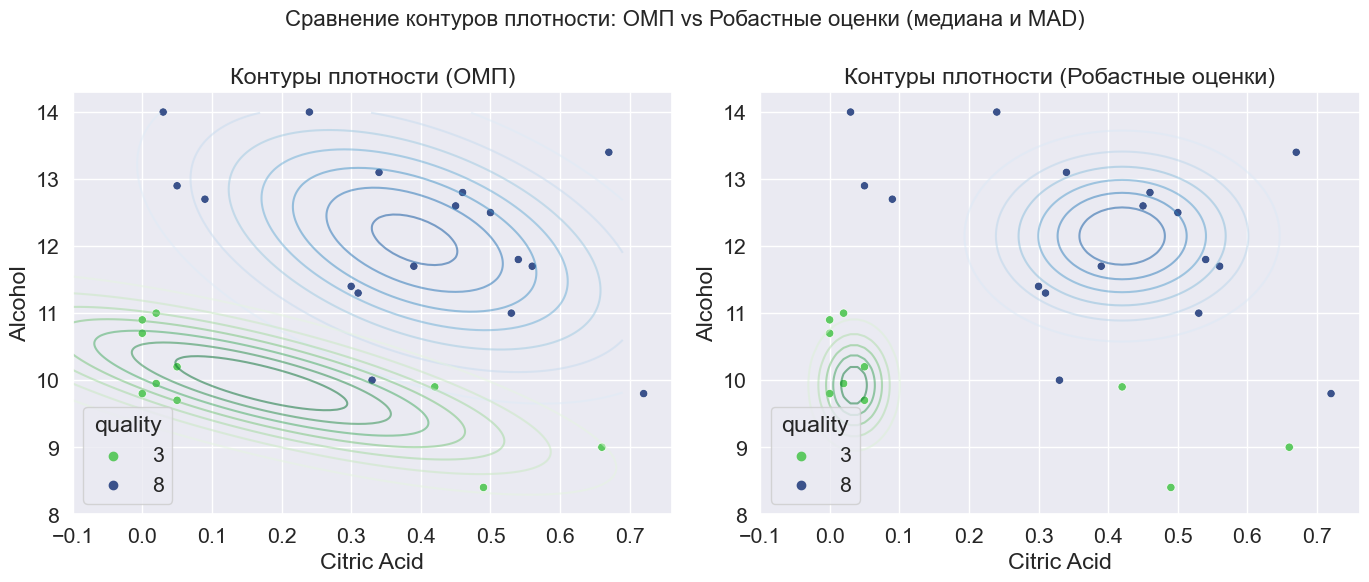

In [18]:
mad_good = np.median(np.abs(good_df[['citric acid', 'alcohol']] - robust_mu_good), axis=0)
mad_bad = np.median(np.abs(bad_df[['citric acid', 'alcohol']] - robust_mu_bad), axis=0)

robust_cov_good = np.diag(mad_good**2)
robust_cov_bad = np.diag(mad_bad**2)

rv1_robust = sps.multivariate_normal(robust_mu_good, robust_cov_good)
rv2_robust = sps.multivariate_normal(robust_mu_bad, robust_cov_bad)

plt.figure(figsize=(14, 6))
plt.suptitle('Сравнение контуров плотности: ОМП vs Робастные оценки (медиана и MAD)', fontsize=16)

plt.subplot(1, 2, 1)
plt.contour(X, Y, rv1_om.pdf(pos), cmap='Blues', alpha=0.5)
plt.contour(X, Y, rv2_om.pdf(pos), cmap='Greens', alpha=0.5)
sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])
plt.title('Контуры плотности (ОМП)')
plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')

plt.subplot(1, 2, 2)
plt.contour(X, Y, rv1_robust.pdf(pos),  cmap='Blues', alpha=0.5)
plt.contour(X, Y, rv2_robust.pdf(pos), cmap='Greens', alpha=0.5)
sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])
plt.title('Контуры плотности (Робастные оценки)')
plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')


plt.tight_layout()
plt.show()


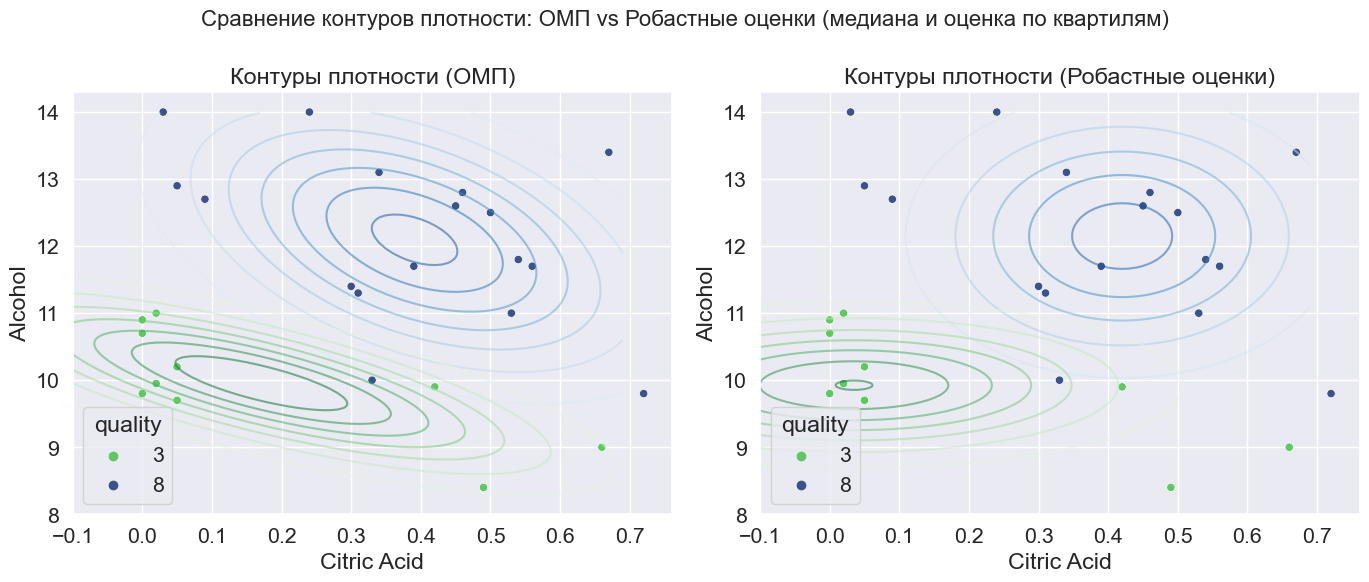

In [19]:
robust_mu_good = np.median(good_df[['citric acid', 'alcohol']], axis=0)
robust_mu_bad = np.median(bad_df[['citric acid', 'alcohol']], axis=0)

iqr_good = np.percentile(good_df[['citric acid', 'alcohol']], 75, axis=0) - np.percentile(good_df[['citric acid', 'alcohol']], 25, axis=0)
iqr_bad = np.percentile(bad_df[['citric acid', 'alcohol']], 75, axis=0) - np.percentile(bad_df[['citric acid', 'alcohol']], 25, axis=0)

robust_cov_good = np.diag((iqr_good / 1.349)**2)
robust_cov_bad = np.diag((iqr_bad / 1.349)**2)

rv1_robust = sps.multivariate_normal(robust_mu_good, robust_cov_good)
rv2_robust = sps.multivariate_normal(robust_mu_bad, robust_cov_bad)

plt.figure(figsize=(14, 6))
plt.suptitle('Сравнение контуров плотности: ОМП vs Робастные оценки (медиана и оценка по квартилям)', fontsize=16)

plt.subplot(1, 2, 1)
plt.contour(X, Y, rv1_om.pdf(pos), cmap='Blues', alpha=0.5)
plt.contour(X, Y, rv2_om.pdf(pos), cmap='Greens', alpha=0.5)
sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])
plt.title('Контуры плотности (ОМП)')
plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')

plt.subplot(1, 2, 2)
plt.contour(X, Y, rv1_robust.pdf(pos),  cmap='Blues', alpha=0.5)
plt.contour(X, Y, rv2_robust.pdf(pos), cmap='Greens', alpha=0.5)
sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])
plt.title('Контуры плотности (Робастные оценки)')
plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')

plt.tight_layout()
plt.show()


Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [20]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

In [63]:
#YOUR CODE GOES HERE

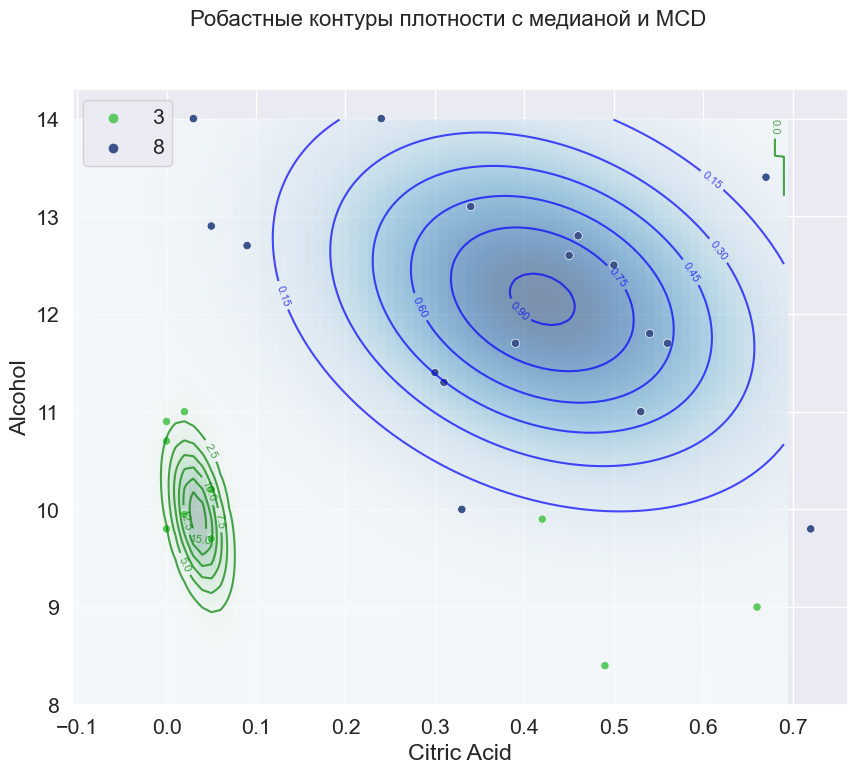

In [21]:
robust_mu_good = np.median(good_df[['citric acid', 'alcohol']], axis=0)
robust_mu_bad = np.median(bad_df[['citric acid', 'alcohol']], axis=0)

robust_cov_good = MinCovDet().fit(good_df[['citric acid', 'alcohol']]).covariance_
robust_cov_bad = MinCovDet().fit(bad_df[['citric acid', 'alcohol']]).covariance_

rv1_robust = sps.multivariate_normal(robust_mu_good, robust_cov_good)
rv2_robust = sps.multivariate_normal(robust_mu_bad, robust_cov_bad)

Z_good = rv1_robust.pdf(pos)
Z_bad = rv2_robust.pdf(pos)

plt.figure(figsize=(10, 8))
plt.suptitle('Робастные контуры плотности с медианой и MCD', fontsize=16)

plt.pcolormesh(X, Y, Z_bad, shading='auto', cmap=get_density_cmap("Greens"), alpha=0.5)
contour_bad = plt.contour(X, Y, Z_bad, colors="green", alpha=0.7)
plt.clabel(contour_bad, inline=True, fontsize=8)

plt.pcolormesh(X, Y, Z_good, shading='auto', cmap=get_density_cmap('Blues'), alpha=0.5)
contour_good = plt.contour(X, Y, Z_good, colors="blue", alpha=0.7)
plt.clabel(contour_good, inline=True, fontsize=8)

sns.scatterplot(y=good_bad_df['alcohol'], x=good_bad_df['citric acid'], hue=good_bad_df['quality'], palette=[palette[0]]+[palette[-1]])

plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')
plt.legend()
plt.show()


Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** На графике видно, что вино, которое получило высокую оценку, имеет высокое содержание алкоголя (ниже 10 даже нет точек синего цвета), что касается кислотности - этот показатель может быть разным для хорошего вина, но судя по графику плотности, кислотность находится примерно на уровне 0.4. Для плохого вина все более понятно - в нем содержание алкоголя меньше (если сравнивать зеленую массу точек с основной синей массой, то синие точки по больше части находятся выше зеленых). Так же кислотность, за редким исключением, ниже определенного значения. Так же надо отметить, что вина с более высокой оценкой распределены более широко - и по содержанию алкоголя, и по кислотности, а вот плохие вина наоборот сосредоточены примерно в одном месте. 



# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, который с высокой вероятностью накрывает истинное значение параметра.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

In [2]:
def draw_confidence_interval(left, right, estimation=None, sample=None, ylim=(None, None), color_estimation='#FF3300',color_interval='#00CC66', color_sample='#0066FF', label_estimation='', label_interval='', xlabel='Размер выборки', title='Зависимость доверительного интервала от размера выборки',
):
    time = np.arange(len(left)) + 1
    assert len(time) == len(right)
    if not sample is None:
        plt.scatter(time, sample, alpha=0.3, color=color_sample, s=40, label='Элемент выборки')
    if not estimation is None:
        plt.plot(time, estimation, color=color_estimation, linewidth=2.5, label=label_estimation)

    plt.fill_between(time, left, right, alpha=0.25, color=color_interval, label=label_interval)
    plt.legend()
    plt.ylim(ylim)
    plt.xlabel(xlabel)
    plt.title(title)

N = 100
alpha = 0.95

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Запишу функцию распределения:
$$F(x; \theta) = P(X_{(n)} \leq x) = \left(\frac{x}{\theta}\right)^n, \quad x \in [0, \theta]$$
Следовательно, $P\left(\frac{X_{(n)}}{\theta} \leq y\right) = y^n$, для $y \in [0, 1]$.
Таким образом, $\frac{X_{(n)}}{\theta}$ имеет распределение $Beta(n, 1)$.
Для доверительного интервала выбиру такие $\alpha$ и $\beta$, что:
$$P\left(\alpha \leq \frac{X_{(n)}}{\theta} \leq \beta \right) = \gamma$$

Пусть $Beta(n, 1)_\alpha$ и $Beta(n, 1)_\beta$ — квантили уровня $\alpha$ и $\beta$ для распределения $Beta(n, 1)$.

Тогда построим доверительный интервал $I$:
$$I_n = \left( \frac{X_{(n)}}{\text{Beta}(n, 1)_\beta}, \frac{X_{(n)}}{\text{Beta}(n, 1)_\alpha} \right)$$

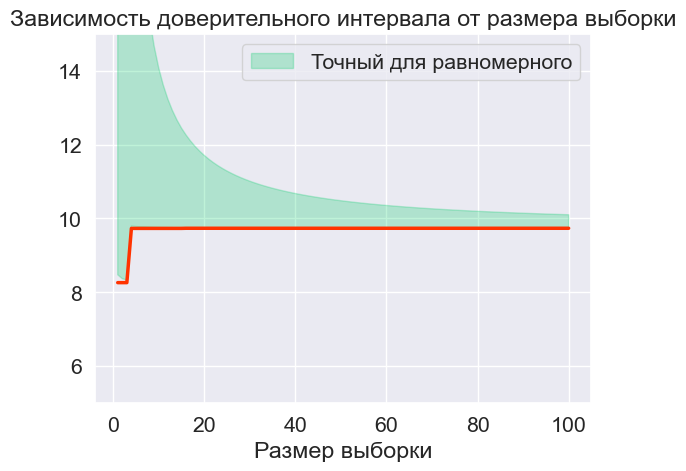

In [6]:
def conf_int(X=sps.uniform(0,10).rvs(N), alpha=alpha):
    est = np.array([X[:i+1].max() for i in range(N)])
    top = est / np.array([sps.beta(n+1, 1).ppf((1-alpha)/ 2) for n in range(N)])
    bot = est /np.array([sps.beta(n+1, 1).ppf((1+alpha)/2) for n in range(N)])
    return est, bot, top

est, bot, top = conf_int()
draw_confidence_interval(bot, top, est, ylim=(5, 15), label_interval='Точный для равномерного')

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Плотность: $P_\theta(X) = \frac{1}{\pi (1 + (x - \theta)^2)}$
Медиана $\mu$ является асимптотически нормальной оценкой параметра $\theta$ при $n \to \infty$, значит, для нее выполняется:
$$\sqrt{n}(\mu - \theta) \xrightarrow{d} \mathcal{N}\left(0, \frac{\pi^2}{4}\right)$$
Медиана $\mu$ имеет асимптотически нормальное распределение с дисперсией $\frac{\pi^2}{4n}$
$$\sqrt{n} \frac{\mu - \theta}{\pi / 2} \xrightarrow{d} \mathcal{N}(0, 1)$$
Тогда запишем асимптотический доверительный интервал для $\theta$ уровня $1 - \alpha$:
$$I_n = \left( \mu - \frac{Z_{\alpha/2} \pi}{2 \sqrt{n}}; \, \mu + \frac{Z_{\alpha/2} \pi}{2 \sqrt{n}} \right)$$
где $Z_{\alpha/2}$ — квантиль уровня $1 - \alpha / 2$ для стандартного нормального распределения.

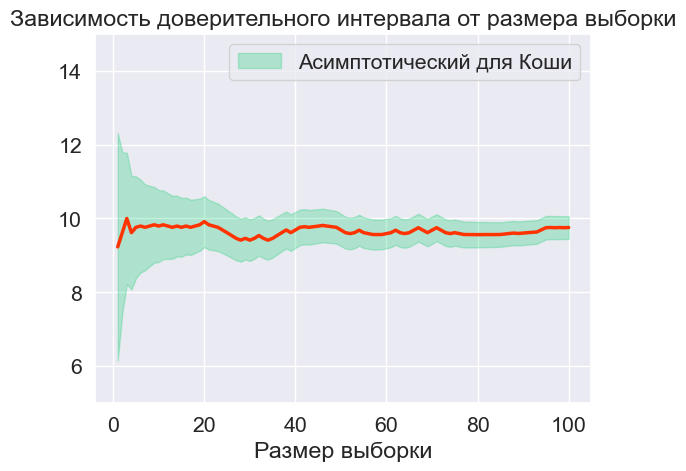

In [7]:
def conf_int(X=sps.cauchy.rvs(loc=10, size=N), alpha=alpha):
    est = np.array([np.median(X[:i+1]) for i in range(N)])
    delta = sps.norm.ppf((1+alpha)/2)/2 * np.pi / np.sqrt(1 + np.arange(N))
    top = est + delta
    bot = est - delta
    return est, bot, top

est, bot, top = conf_int()
draw_confidence_interval(bot, top, est, ylim=(5, 15), label_interval='Асимптотический для Коши')

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

$\bar{X}$ — эффективная оценка и асимптотически эффективная оценка для $\theta$ (т.е. $\bar{X} = \text{ОМП}$).
$\mathbb{E}[\bar{X}] = \theta$ и $\operatorname{Var}(\bar{X}) = \frac{\theta}{n}$.
Значит, $\sigma(\hat{\theta}) = \sqrt{\frac{\theta}{n}}$ и $\sigma(\theta) = \sqrt{\theta}$, где $\sigma({\theta})$ непрерывная функция по $\theta$.
Применю теорему о наследовании сходимости: $\sigma(\hat{\theta}_n)$ сходится к $\sigma(\theta)$ по вероятности, значит:
$$\sqrt{n} \frac{\hat{\theta}_n(X) - \theta}{\sigma(\hat{\theta}_n)} \xrightarrow{d} \mathcal{N}(0, 1).$$
Значит, асимптотический доверительный интервал для $\theta$ уровня $1 - \alpha$ на основе состоятельной оценки для $\sigma$ имеет вот такой вид:
$$I_n(X) = \left( \hat{\theta}_n(X) + \frac{\sigma(\hat{\theta}_n)}{\sqrt{n}} Z_{\alpha/2}; \; \hat{\theta}_n(X) - \frac{\sigma(\hat{\theta}_n)}{\sqrt{n}} Z_{\alpha/2} \right).$$
Теперь осталось подставить:
$$I_n(X) = \left( \bar{X} + \frac{\sqrt{\bar{X}}}{\sqrt{n}} Z_{\alpha/2}; \; \bar{X} - \frac{\sqrt{\bar{X}}}{\sqrt{n}} Z_{\alpha/2} \right).$$


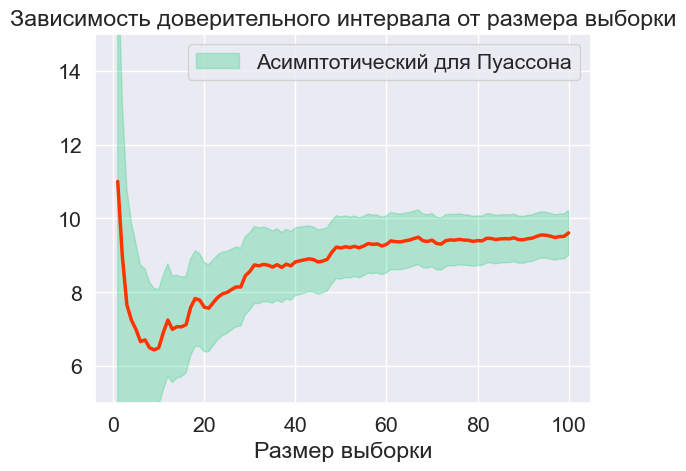

In [8]:
def conf_int(X=sps.poisson(10).rvs(size=N), alpha=alpha):
    est = np.cumsum(X)/ (1 + np.arange(N))
    delta = sps.norm.ppf((1+alpha)/2) * np.sqrt(est) / np.sqrt(1 + np.arange(N))
    top = est + delta
    bot = est - delta
    return est, bot, top

est, bot, top = conf_int()
draw_confidence_interval(bot, top, est, ylim=(5, 15), label_interval='Асимптотический для Пуассона')

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Плотность: $f(x; \theta, \lambda) = \frac{1}{\Gamma(\lambda) \theta^\lambda} x^{\lambda - 1} e^{-x / \theta}$

$\mathbb{E}[X] = \lambda \theta$ и $\hat{\theta} = \frac{\overline{X}}{\lambda} = \frac{1}{n \lambda} \sum_{i=1}^n X_i$ — состоятельная оценка для $\theta$.
Запишем сумму: $S_n = \sum_{i=1}^n X_i \sim \text{Gamma}(n \lambda, \theta)$.
Тогда можно построить такой доверительный интервал для $\theta$ на основе оценки:
$$I = \left( \frac{\sum_{i=1}^n X_i}{\text{Gamma}(n \lambda)_{1 - \alpha/2}}; \, \frac{\sum_{i=1}^n X_i}{\text{Gamma}(n \lambda)_{\alpha/2}} \right)$$
где $\text{Gamma}$ — квантиль гамма-распределения с параметрами $(n \lambda, 1)$ для уровней $1 - \alpha/2$ и $\alpha/2$.

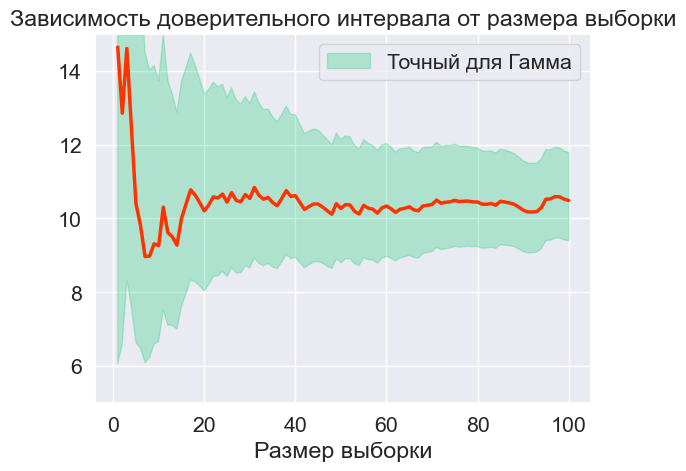

In [9]:
def conf_int(X=sps.gamma(a=3, scale=10).rvs(size=N), alpha=alpha):
    est = np.cumsum(X) / (1 + np.arange(N))/3
    top = np.cumsum(X) / np.array([sps.gamma(a=3 * (n+1), scale=1).ppf((1-alpha)/2) for n in range(N)])
    bot = np.cumsum(X) / np.array([sps.gamma(a=3 * (n+1), scale=1).ppf((1+alpha)/2) for n in range(N)])
    return est, bot, top

est, bot, top = conf_int()
draw_confidence_interval(bot, top, est, ylim=(5, 15), label_interval='Точный для Гамма')

Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод: Можно заметить, что доверительные интервалы довольно точны, также можно отметить, что настоящее значение почти всегда попадает в них. Интервалы бывают широкие, бывают и узкие. Ассимптотические интервалы выглядят уже, но они не точные и могут ошибаться при недостаточно большом n. От интервалов думаю ничего не ожидается. Но хотелось бы чтобы они были уже, тогда мы предсказываем значение точнее. Ширина в общем случае зависит от "размазанности" распределения, и ширина ассимптотического интервала прямопропорциональна корню из дисперсии. Поэтому, можно ожидать, что для точных интервалов выполняется похожее свойство.

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

In [10]:
N = 30
X = sps.norm().rvs((1, N))

def exact_int(X, alpha=0.95):
    n = N
    est = X.cumsum(axis=1) / (1 + np.arange(n))
    S = np.sqrt((np.square(X).cumsum(axis=1) / (1 + np.arange(n)) - np.square(est)) / (np.arange(n)) * (1 + np.arange(n)))
    delta = S / np.sqrt(1 + np.arange(n)) * np.array([sps.t(df=i).ppf((1+alpha)/2) for i in range(n)])
    bot = est - delta
    top = est + delta
    return est, bot, top

def a_int(X, alpha=0.95):
    n = N
    est = X.cumsum(axis=1) / (1 + np.arange(n))
    S = np.sqrt((np.square(X).cumsum(axis=1) / (1 + np.arange(n)) - np.square(est)))
    delta = S / np.sqrt(1 + np.arange(n)) * sps.norm().ppf((1+alpha)/2)
    bot = est - delta
    top = est + delta
    
    
    return est, bot, top


def b_int(X, alpha=0.95, b_samp=1000):
    n = N
    est = X.cumsum() / (1 + np.arange(n))
    samples = np.random.choice(X, size=(b_samp, n))
    means = samples.cumsum(axis=1) / (1 + np.arange(n))
    bot = np.quantile(means, q=(1-alpha)/2, axis=0)
    top = np.quantile(means, q=(1+alpha)/2, axis=0)

    return est, bot, top

C:\Users\natas\AppData\Local\Temp\ipykernel_14412\2414358052.py:7: RuntimeWarning: invalid value encountered in divide
  S = np.sqrt((np.square(X).cumsum(axis=1) / (1 + np.arange(n)) - np.square(est)) / (np.arange(n)) * (1 + np.arange(n)))


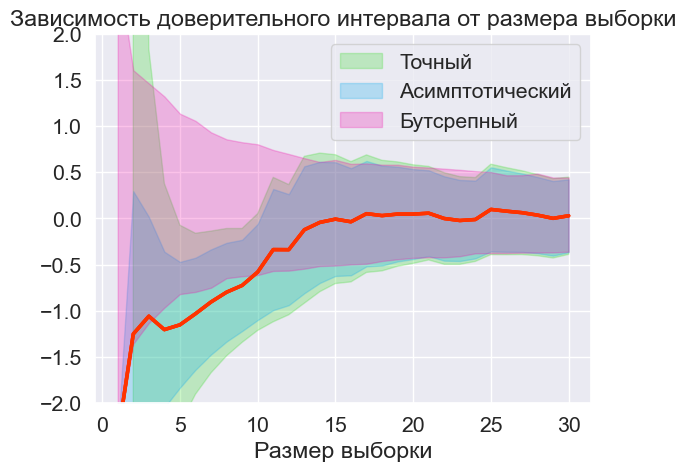

In [11]:
est, bot, top = exact_int(X)
draw_confidence_interval(bot[0], top[0], est[0], ylim=(-2, 2), label_interval='Точный', color_interval='#36db27')
est, bot, top = a_int(X)
draw_confidence_interval(bot[0], top[0], est[0], ylim=(-2, 2), label_interval='Асимптотический', color_interval='#0cabf0')
est, bot, top = b_int(X[0])
draw_confidence_interval(bot, top, est, ylim=(-2, 2), label_interval='Бутсрепный', color_interval='#f00cab')

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

In [12]:
M = 10000
X = sps.norm().rvs((M, N))
est, bot, top = exact_int(X)
print(f'Покрытие точного интервала: {((bot[:,1:] < 0) & (top[:,1:] > 0)).mean():.4}')
est, bot, top = a_int(X)
print(f'Покрытие асимптотического интервала для n >= 25: {((bot[:,25:] < 0) & (top[:,25:] > 0)).mean():.4}')
print(f'Покрытие асимптотического интервала: {((bot[:,:] < 0) & (top[:,:] > 0)).mean():.4}')
c = 0
for x in X:
    est, bot, top = b_int(x)
    c += ((bot[-1] < 0) & (top[-1] > 0)).sum()

print(f'Покрытие бутстрепного интервала: {c / 10000:.4}')

C:\Users\natas\AppData\Local\Temp\ipykernel_14412\2414358052.py:7: RuntimeWarning: invalid value encountered in divide
  S = np.sqrt((np.square(X).cumsum(axis=1) / (1 + np.arange(n)) - np.square(est)) / (np.arange(n)) * (1 + np.arange(n)))


Покрытие точного интервала: 0.9489
Покрытие асимптотического интервала для n >= 25: 0.9329
Покрытие асимптотического интервала: 0.8646
Покрытие бутстрепного интервала: 0.9304


Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод: 

Точный интервал дает почти точный результат в любом случае и он сильно большой только при маленьких размерах выборки. Так что при достаточных размерах можно использовать его.

Асимптотический очень плох для маленьких размеров выборки, но становиться хорошим при ее увеличении. Найти его легче чем точный, и они не сильно отличаются. Его плохо использовать для маленьких выборок.

Бутстрепный интервал шире двух других, но при увеличении выборки они сравниваются. Для него нужно больше вычислений чем для двух других. Но он показывает себя лучше на маленьких выборках, чем асимптотический.

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [17]:
!gdown https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-

C:\Users\natas\AppData\Roaming\Python\Python311\site-packages\gdown\parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-
To: C:\Users\natas\PycharmProjects\math_stat_homework\1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-

0.00B [00:00, ?B/s]
77.8kB [00:00, 416kB/s]
91.5kB [00:00, 488kB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [19]:
data = pd.read_csv('city_day.csv', usecols=[0, 1, 14], parse_dates=[1])
data.dtypes

City            object
Date    datetime64[ns]
AQI            float64
dtype: object

In [20]:
data = data[data['Date'] >= np.datetime64('2018-07-01')]
data = data[(data['City'] == 'Mumbai') | (data['City'] == 'Kolkata')]

In [21]:
data.isna().sum()

City     0
Date     0
AQI     11
dtype: int64

In [22]:
data = data.dropna()
data.head()

,City,Date,AQI
19114,Kolkata,2018-07-01,58.0
19115,Kolkata,2018-07-02,62.0
19116,Kolkata,2018-07-03,50.0
19117,Kolkata,2018-07-04,58.0
19118,Kolkata,2018-07-05,57.0


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включительно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [23]:
def b_int(X, k=1000):
    aqi = np.array(X)
    est = aqi.mean()
    bootstrapped = np.random.choice(aqi, size=(k, len(aqi)))
    means = bootstrapped.mean(axis=1)
    bot = np.quantile(means, q=(1-alpha)/2, axis=0)
    top = np.quantile(means, q=(1+alpha)/2, axis=0)

    return est, bot, top

In [24]:
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)

In [25]:
data.head()

,City,Date,AQI,Year,Month
19114,Kolkata,2018-07-01,58.0,2018,7
19115,Kolkata,2018-07-02,62.0,2018,7
19116,Kolkata,2018-07-03,50.0,2018,7
19117,Kolkata,2018-07-04,58.0,2018,7
19118,Kolkata,2018-07-05,57.0,2018,7


In [27]:
data1 = data[data['Date'] <= np.datetime64('2020-07-01')]

In [28]:
data1_m = data1[data1['City'] == 'Mumbai']
data1_k = data1[data1['City'] == 'Kolkata']

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

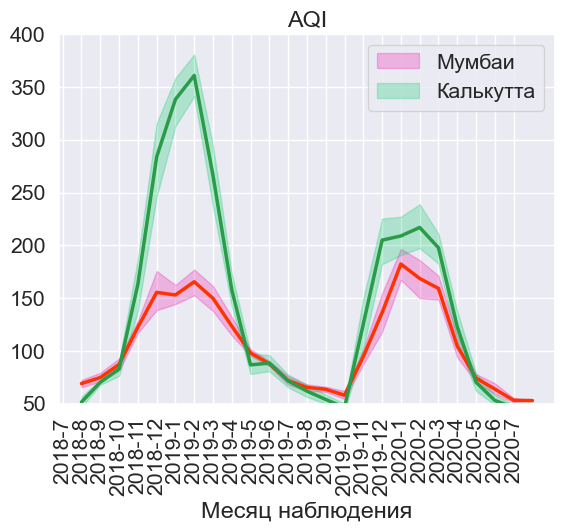

In [29]:
est, bot, top = list(zip(*data1_m.groupby(by=['Year', 'Month'])['AQI'].apply(b_int)))
draw_confidence_interval(bot, top, est, ylim=(50, 400), label_interval='Мумбаи', color_interval='#f00cab', xlabel='Месяц наблюдения', title='AQI')
est, bot, top = list(zip(*data1_k.groupby(by=['Year', 'Month'])['AQI'].apply(b_int)))
draw_confidence_interval(bot, top, est, color_estimation='#2a9c48', label_interval='Калькутта', xlabel='Месяц наблюдения', title='AQI')
plt.xticks(ticks=np.arange(len(est))[::], labels=list(map(lambda x: f'{x[0]}-{x[1]}', list(data1_m.groupby(by=['Year', 'Month'])['AQI'].apply(b_int).index)))[::], rotation=90)
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Можно заметить, что с наступлением холодных периодов года значения повышаются, и зимой наступает пик. При этом в Калькутте значения выше, чем в Мумбаи. А вот летом значения у обоих городов понижаются. В целом, логичный вывод, который можно сделать - изменения связаны с изменениями климата. 

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

In [30]:
data2 = data[(data['City'] == 'Mumbai') & (data['Month'] == 5)]
data2_19 = data2[data2['Year'] == 2019]
data2_20 = data2[data2['Year'] == 2020]

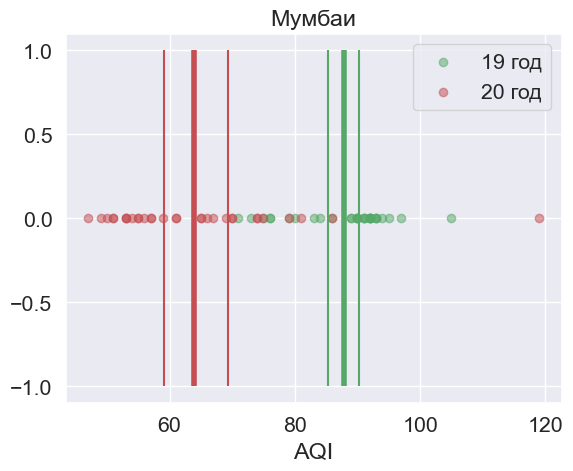

In [31]:
est, bot, top = b_int(data2_19['AQI'])
plt.scatter(data2_19['AQI'], np.zeros_like(data2_19['AQI']), color='g', label='19 год', alpha=0.5)
plt.vlines(est, -1, 1, color='g', linewidth=4)
plt.vlines([bot, top], -1, 1, color='g')

est, bot, top = b_int(data2_20['AQI'])
plt.scatter(data2_20['AQI'], np.zeros_like(data2_20['AQI']), color='r', label='20 год', alpha=0.5)
plt.vlines(est, -1, 1, color='r', linewidth=4)
plt.vlines([bot, top], -1, 1, color='r')
plt.legend()
plt.title('Мумбаи')
plt.xlabel('AQI')

plt.show()

In [32]:
data2 = data[(data['City'] == 'Kolkata') & (data['Month'] == 5)]
data2_19 = data2[data2['Year'] == 2019]
data2_20 = data2[data2['Year'] == 2020]

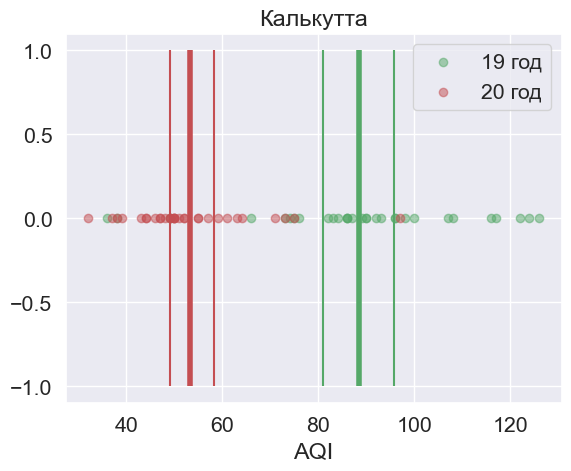

In [33]:
est, bot, top = b_int(data2_19['AQI'])
plt.scatter(data2_19['AQI'], np.zeros_like(data2_19['AQI']), color='g', label='19 год', alpha=0.5)
plt.vlines(est, -1, 1, color='g', linewidth=4)
plt.vlines([bot, top], -1, 1, color='g')

est, bot, top = b_int(data2_20['AQI'])
plt.scatter(data2_20['AQI'], np.zeros_like(data2_20['AQI']), color='r', label='20 год', alpha=0.5)
plt.vlines(est, -1, 1, color='r', linewidth=4)
plt.vlines([bot, top], -1, 1, color='r')
plt.legend()
plt.title('Калькутта')
plt.xlabel('AQI')

plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?

Можно заметить, что если у данных большая дисперсия, то и бутстрепный интервал становится шире. Доверительные интервалы не пересекаются, и поэтому можно утверждать, что AQI уменьшается год к году. Видимо, можно сделать вывод, что качество воздуха ухудшается. Но так же может быть, что климат немного изменился в апреле, а вообще, судить только по двум годам сложно. Если было бы больше лет, можно было бы сделать более четкие выводы.
